# <font color='black'><b> Extra) Fuzzy Rule Based Expert System Evaluation </b></font>

Authors: André Amaral (90012) and Tomás Bessa (90200).

Computational Intelligence October 2021.

<i>This jupiter was created in order to evaluate fuzzy system. Although it has rudimental code it takes time to proceed to the evaluation, that is way a seperated code sheet was created. </i>

### Import the Other Notebook

Import the principal notbook into this notebook.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Requests  1999 non-null   float64
 1   Load      1999 non-null   float64
 2   Falha     1999 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


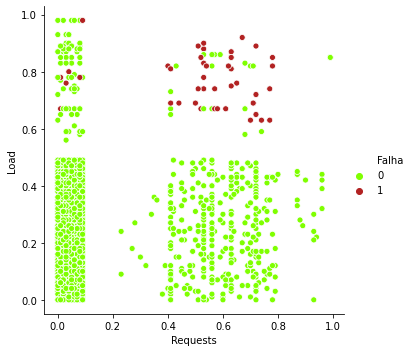

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       489
           1       1.00      0.18      0.31        11

    accuracy                           0.98       500
   macro avg       0.99      0.59      0.65       500
weighted avg       0.98      0.98      0.98       500

 
[[489   0]
 [  9   2]]
 
0.982
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       360
           1       1.00      0.07      0.12        15

    accuracy                           0.96       375
   macro avg       0.98      0.53      0.55       375
weighted avg       0.96      0.96      0.95       375

 
[[360   0]
 [ 14   1]]
 
0.9626666666666667


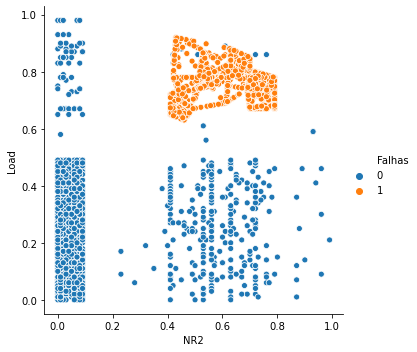

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       293
           1       0.47      1.00      0.64         7

    accuracy                           0.97       300
   macro avg       0.73      0.99      0.81       300
weighted avg       0.99      0.97      0.98       300

 
[[285   8]
 [  0   7]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       247
           1       0.67      1.00      0.80         8

    accuracy                           0.98       255
   macro avg       0.83      0.99      0.90       255
weighted avg       0.99      0.98      0.99       255

 
[[243   4]
 [  0   8]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       293
           1       0.46      0.86      0.60         7

    accuracy                           0.97       300
   macro avg       0.73      0.92      0.79       300
weighted avg       0.98 

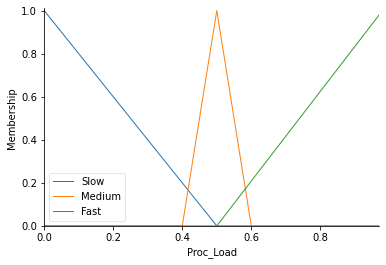

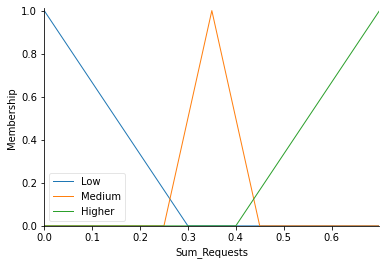

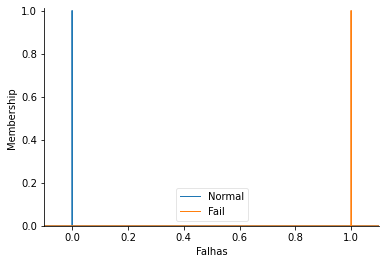

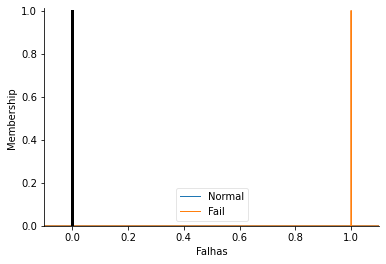

In [1]:
%run Project1_G11.ipynb

### "Train" the Fuzzy System

Prepare the data to train and evaluate the fuzzy system, in order to be equal to the one who trained the MLP.

In [2]:
# Obtain the data for Train and Test
X2_train_fuzzy, X2_test_fuzzy, Y2_train_fuzzy, Y2_test_fuzzy = train_test_split(X2,Y2,test_size=0.15, random_state = 101, shuffle = False)
X2_train_fuzzy, Y2_train_fuzzy = SMOTE().fit_resample(X2_train_fuzzy, Y2_train_fuzzy)

# Obtain the data for Validation (given by the professor)
X_final = eval_df.drop('Falha', axis = 1)
Y_final = eval_df['Falha']

df_fuzzy_train = pd.concat([X2_train_fuzzy,Y2_train_fuzzy], axis = 1)
df_fuzzy_test = pd.concat([X2_test_fuzzy,Y2_test_fuzzy], axis = 1)
df_fuzzy_final = pd.concat([X_final,Y_final], axis = 1)

In [3]:
# we create the variables to allocate the values in need
TP_train = 0
TN_train = 0
FN_train = 0
FP_train = 0

# in this cycle we iterate all rows of the dataset and apply it to our fuzzy system
for index, row in df_fuzzy_train.iterrows():
    Fuzzy_System.input['Proc_Load'] = row['Load']
    Fuzzy_System.input['Sum_Requests'] = row['Sum_Previous_Requests']
    Fuzzy_System.compute()
    result = np.int(round(Fuzzy_System.output['Falhas']))
    
    #Here we increment the number of true positives, true negatives, false positives and false negatives
    if result ==1:
        if result == row['Falha']:
            TP_train = TP_train + 1
        else:
            FP_train = FP_train + 1
    if result == 0:
        if result == row['Falha']:
            TN_train = TN_train + 1
        else:
            FN_train = FN_train + 1

# Here the confusion matrix is computed.
M = np.matrix([[TP_train, FP_train], [FN_train, TN_train]])
print(M)

# This approach will also be used for testing and validation.

[[1608    7]
 [  48 1649]]


As we can see the fuzzy system with the training set, which is balanced, performes very well, although, as mentioned in the conclusions, the "Gray Area" will create some mistakes due to the weigth given by the membership function. Obviously, the membership functions could be optimized, using Neural-Fuzzy.

### "Evaluate" the Fuzzy System

In [4]:
TP_test = 0
TN_test = 0
FN_test = 0
FP_test = 0

for index, row in df_fuzzy_test.iterrows():
    Fuzzy_System.input['Proc_Load'] = row['Load']
    Fuzzy_System.input['Sum_Requests'] = row['Sum_Previous_Requests']
    Fuzzy_System.compute()
    result = np.int(round(Fuzzy_System.output['Falhas']))
    
    if result ==1:
        if result == row['Falha']:
            TP_test = TP_test + 1
        else:
            FP_test = FP_test + 1
    if result == 0:
        if result == row['Falha']:
            TN_test = TN_test + 1
        else:
            FN_test = FN_test + 1

M = np.matrix([[TP_test, FP_test], [FN_test, TN_test]])
print(M)

[[  6   2]
 [  1 291]]


The testing results were better than the trainning one, it might happen due to the data sequentiality be different.

### "Validate" the Fuzzy System

Using the dataset given by the professor for testing.

In [5]:
TP_final = 0
TN_final = 0
FN_final = 0
FP_final = 0

for index, row in df_fuzzy_final.iterrows():
    Fuzzy_System.input['Proc_Load'] = row['Load']
    Fuzzy_System.input['Sum_Requests'] = row['Requests']
    Fuzzy_System.compute()
    result = np.int(round(Fuzzy_System.output['Falhas']))
    
    if result ==1:
        if result == row['Falha']:
            TP_final = TP_final + 1
        else:
            FP_final = FP_final + 1
    if result == 0:
        if result == row['Falha']:
            TN_final = TN_final + 1
        else:
            FN_final = FN_final + 1

M = np.matrix([[TP_final, FP_final], [FN_final, TN_final]])
print(M)

[[  5   9]
 [  3 183]]


As expected, due to the overfiting effect, despite not being very prevalent in this case, the validation results are a sligthly worse than the trainning and validation ones.